IRIS 데이터에 대해 클러스터링을 해보고 모델 평가를 하는 코드입니다.    
이 코드에서는 교차표를 이용해 결과를 확인하는데, 이 외에도 파라머_Clustering.ipynb에 나오는 silhouette_score나 수업시간에 배운 다른 모델 평가 방식을 사용해보길 바랍니다.    
과제 #3은 Mall_Customer.csv 데이터를 불러오고, 전처리와 EDA를 한 후,    
수업시간에 배운 아래의 세 가지 방법 + 새로운 방법 최소 한 가지를 이용해 Clustering을 하고      
하이퍼파라미터도 변화시켜보고    
다양한 Clustering 방법에 대해 비교/평가하는 과제입니다.

In [28]:
from sklearn import datasets
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
mall = pd.read_csv("Mall_Customers.csv")

In [29]:
mall.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [30]:
def make(x):
    if x=='Male':
        return 0
    else :
        return 1
    
mall['Gender'] = mall['Gender'].apply(make) 


In [31]:
del mall['CustomerID']

In [32]:
mall.columns=['Gender','Age','Annual_Income','Spend_score']
labels = mall['Gender']

In [33]:
mall.head()

,Gender,Age,Annual_Income,Spend_score
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


In [34]:
mall.isnull().sum() #결측치가 없음을 확인

Gender           0
Age              0
Annual_Income    0
Spend_score      0
dtype: int64

In [35]:
X = mall[['Age','Annual_Income','Spend_score']]

In [36]:
y = mall['Gender']

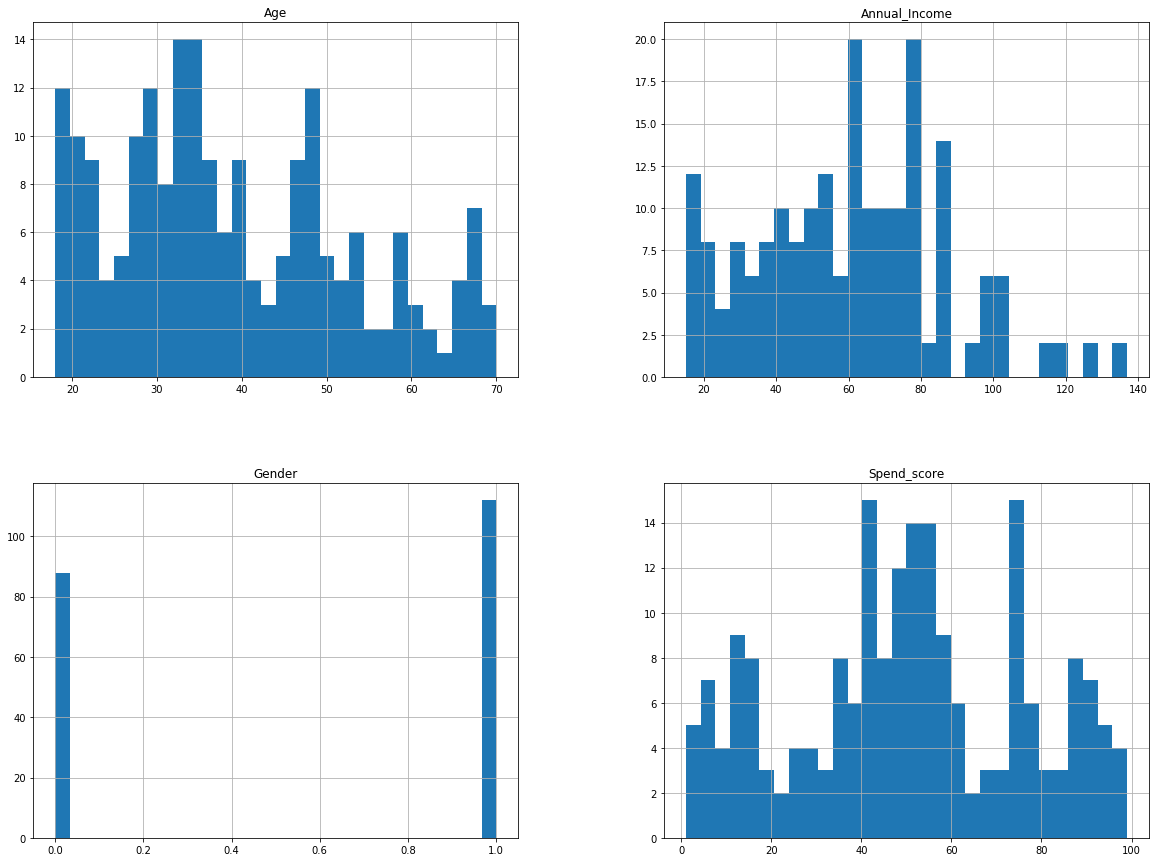

In [37]:
mall.hist(bins=30,figsize=(20,15)) #figsize를 통해 plot 크기 조절
plt.show()

- 히스토그램을 통해서 Gender의 여자성별이 더 많음을 파악함
- 성별은 30대 중반이 제일 많음을 알 수 있음

# Hierarchical Clustering

- 계층형 군집화

개체들을 가까운 집단부터 차근차근 묶어가는 방식
군집화 결과 뿐만 아니라 유사한 개체들이 결합되는 절차까지
Agglomerative/ Divisive

In [38]:
from sklearn.cluster import AgglomerativeClustering

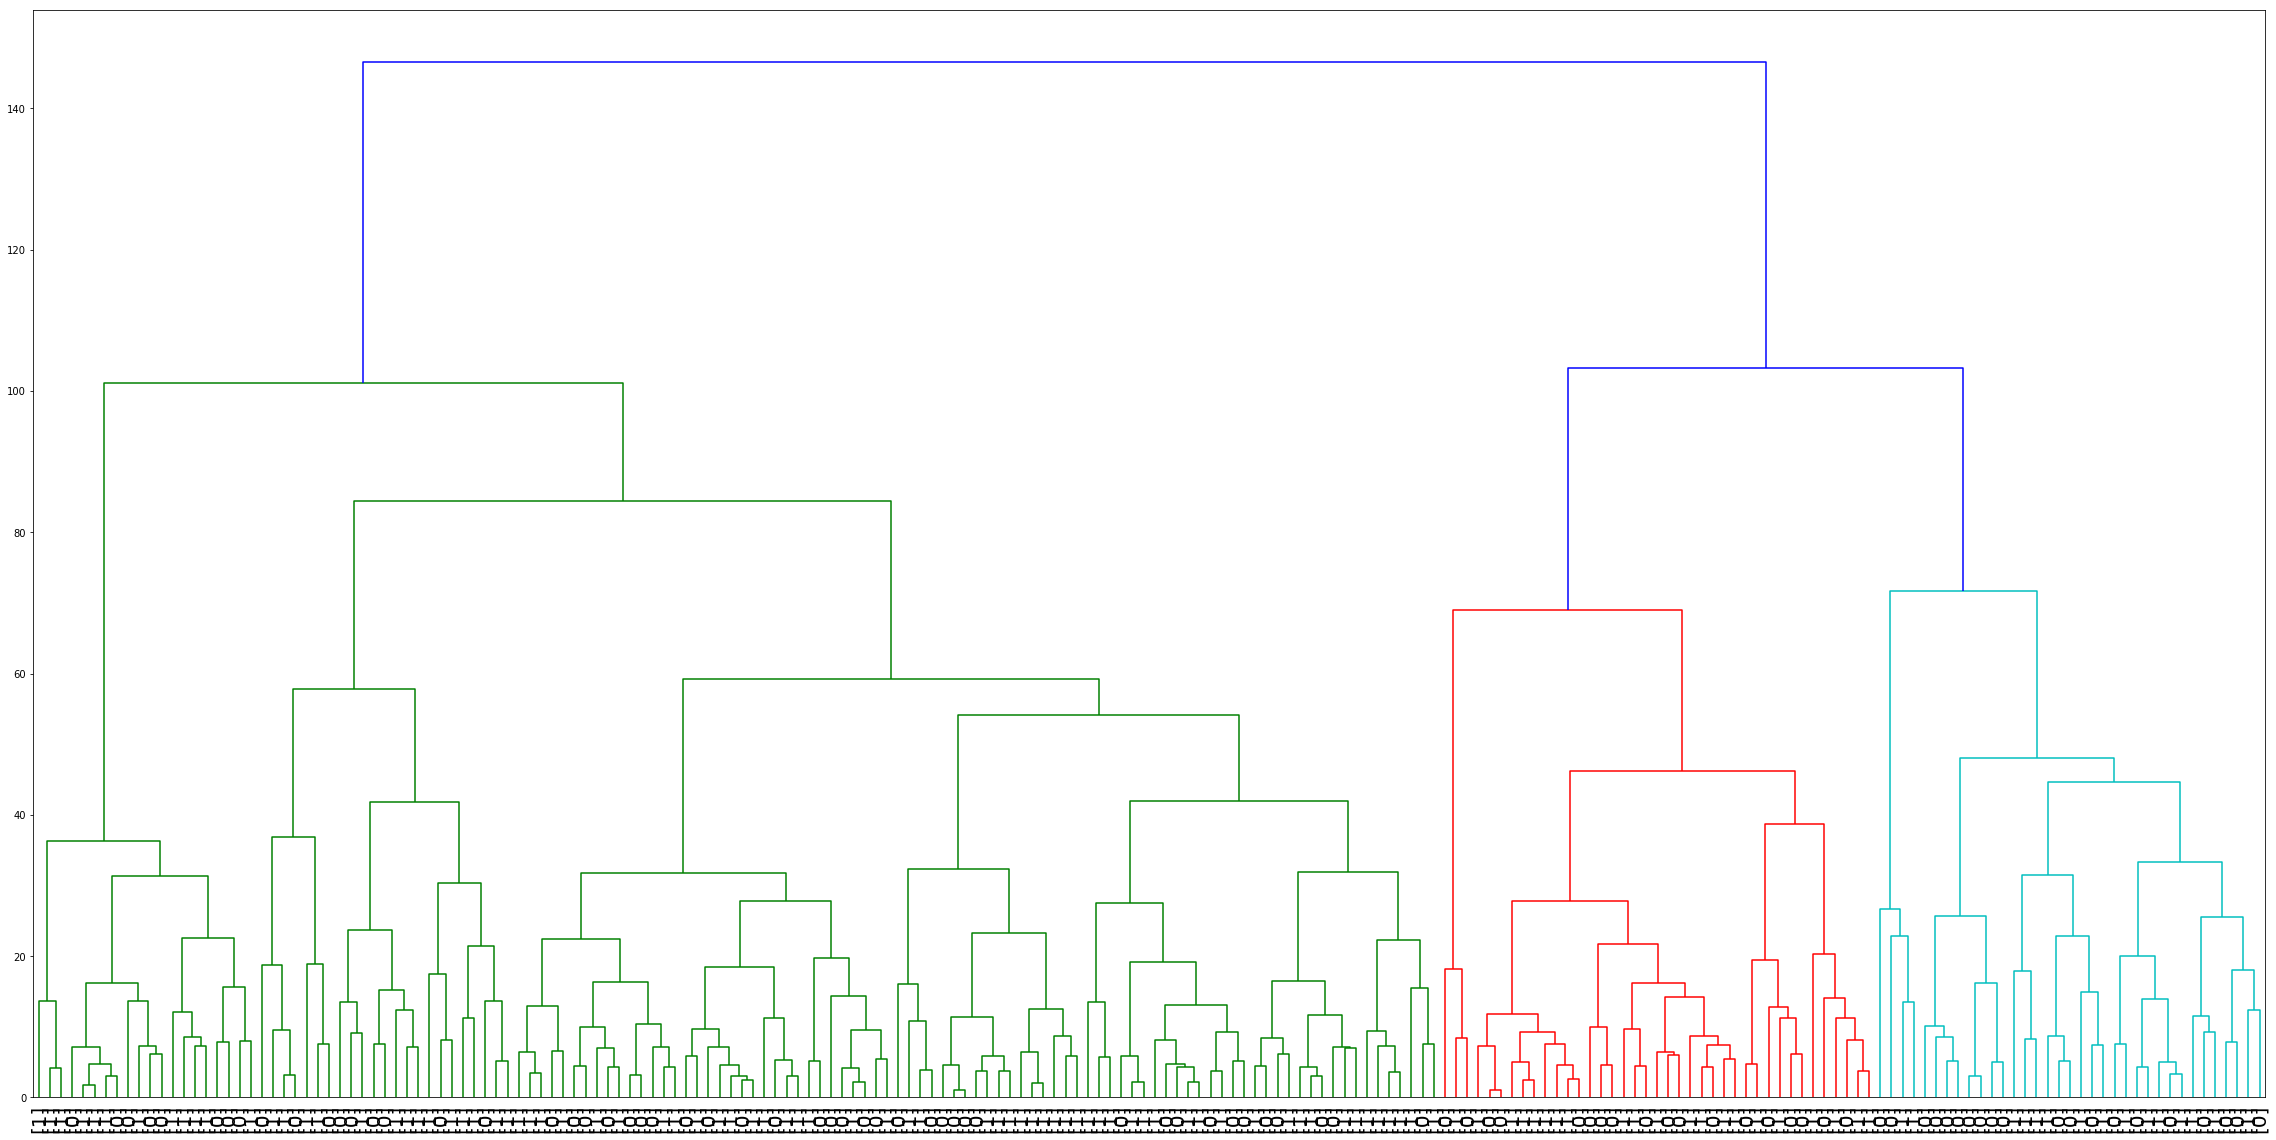

In [39]:
import pandas as pd

from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.cluster.hierarchy import fcluster

###########

# Calculate the linkage: mergings
mergings = linkage(mall, method='complete')

# Plot the dendrogram, using varieties as labels
import matplotlib.pyplot as plt
plt.figure(figsize=(40,20))
dendrogram(mergings,
           labels = mall.as_matrix(columns=['Gender']),
           leaf_rotation=90,
           leaf_font_size=20,
)
plt.show()


## Evaluate model with Cross tabulation

https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.fcluster.html

In [80]:
from scipy.cluster.hierarchy import fcluster

# fcluster(linkage함수, 클러스터링을 멈추도록하는 임계값, 거리를 기준으로)
# 위의 덴드로그램에서 클러스터간의 거리가 3인 지점에서 자르면 3개의 cluster가 형성됨을 알 수 있다.
# 따라서 임계값을 3으로 정한다.
predict = pd.DataFrame(fcluster(mergings,3,criterion='distance'))
predict.columns=['predict'] # predict column에 예측 결과


# K-means Clustering

In [56]:
feature = mall[['Gender','Age','Annual_Income','Spend_score']]

In [64]:
from sklearn.cluster import KMeans
import matplotlib.pyplot  as plt
import seaborn as sns

# create model and prediction
model = KMeans(n_clusters=3,algorithm='auto')
model.fit(feature)

predict = pd.DataFrame(model.predict(feature))
predict.columns=['predict']

# concatenate labels to df as a new column
r = pd.concat([feature,predict],axis=1)

In [65]:
r.head()

,Gender,Age,Annual_Income,Spend_score,predict
0,0,19,15,39,0
1,0,21,15,81,0
2,1,20,16,6,0
3,1,23,16,77,0
4,1,31,17,40,0


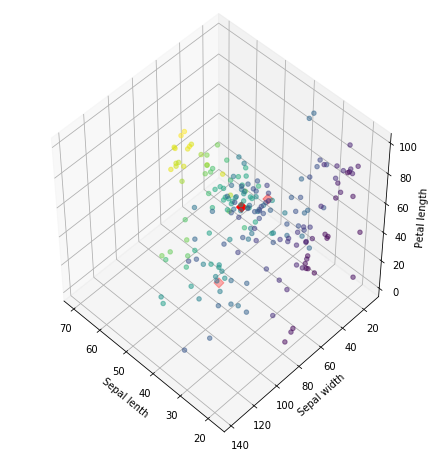

In [67]:
centers = pd.DataFrame(model.cluster_centers_,columns=['Gender','Age','Annual_Income','Spend_score'])
center_x = centers['Age']
center_y = centers['Annual_Income']
center_z = centers['Spend_score']

from mpl_toolkits.mplot3d import Axes3D
# scatter plot
fig = plt.figure( figsize=(6,6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(r['Age'],r['Annual_Income'],r['Spend_score'],c=r['Age'],alpha=0.5)
ax.scatter(center_x,center_y,center_z,s=50,marker='D',c='r')
ax.set_xlabel('Age')
ax.set_ylabel('Annual_Income')
ax.set_zlabel('Spend_score')
plt.show()

## Evaluate model with Cross tabulation

In [68]:
ct = pd.crosstab(mall['Gender'],r['predict'])
print (ct)
print (model.inertia_)

predict   0   1   2
Gender             
0        50  18  20
1        73  21  18
143391.59236035682


## Scaling value

In [69]:
# Scaling 한 후 적용해보기
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
model = KMeans(n_clusters=3)
pipeline = make_pipeline(scaler,model)
pipeline.fit(feature)
predict = pd.DataFrame(pipeline.predict(feature))
predict.columns=['predict']

# concatenate labels to df as a new column
r = pd.concat([feature,predict],axis=1)

ct = pd.crosstab(mall['Age'],r['predict'])
print (ct)
print (model.inertia_)

predict  0  1  2
Age             
18       0  0  4
19       0  2  6
20       1  1  3
21       0  0  5
22       0  0  3
23       1  0  5
24       0  0  4
25       1  1  1
26       0  0  2
27       1  0  5
28       1  0  3
29       1  0  4
30       0  0  7
31       3  0  5
32       2  1  8
33       0  1  2
34       2  1  2
35       2  1  6
36       2  1  3
37       1  2  0
38       2  1  3
39       0  0  3
40       3  2  1
41       2  0  0
42       1  1  0
43       1  2  0
44       2  0  0
45       3  0  0
46       2  1  0
47       4  2  0
48       0  5  0
49       6  1  0
50       4  1  0
51       2  0  0
52       1  1  0
53       0  2  0
54       3  1  0
55       1  0  0
56       1  0  0
57       1  1  0
58       1  1  0
59       0  4  0
60       2  1  0
63       1  1  0
64       0  1  0
65       1  1  0
66       1  1  0
67       1  3  0
68       2  1  0
69       0  1  0
70       0  2  0
476.78755441351586


## 최적의 군집 수 K 결정 (Elbow Point)

Text(0.5,1,'Elbow curve')

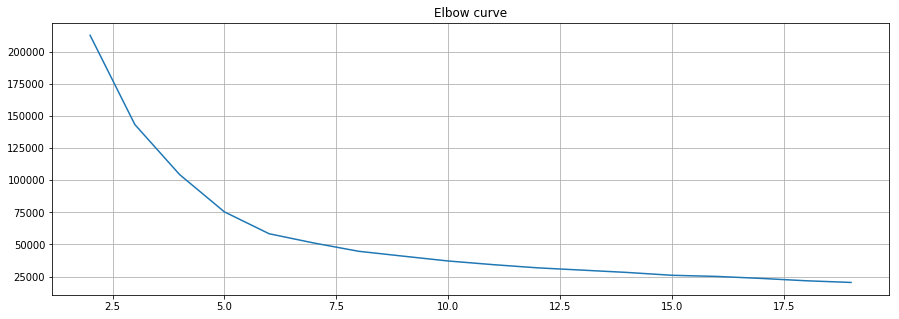

In [70]:
X = feature
distorsions = []

# 군집 수 K의 변화에 따라
# Inertia Value: 군집화가 된 후에, 각 중심점에서 군집내의 데이터간의 거리를 합산한 것
# 즉, 군집의 응집도를 나타내는 값
# 이 값을 구해 그래프로 그린다!
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 20), distorsions)
plt.grid(True)
plt.title('Elbow curve')

# 급격하게 하강하다가 변화의 폭이 크지 않는 지점 Elbow Point를 찾는다.

# DBSCAN

In [71]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot  as plt
import seaborn as sns

# create model and prediction
model = DBSCAN(eps=0.3,min_samples=6)
predict = pd.DataFrame(model.fit_predict(feature))
predict.columns=['predict']

# concatenate labels to df as a new column
r = pd.concat([feature,predict],axis=1)

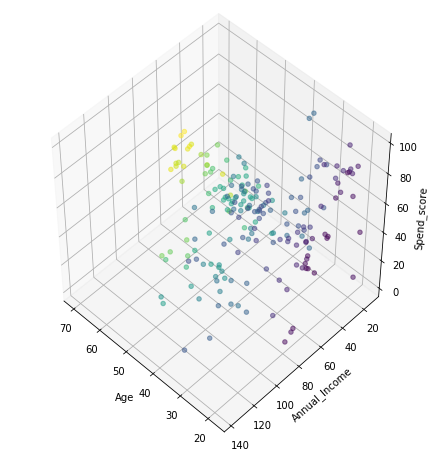

In [74]:
from mpl_toolkits.mplot3d import Axes3D
# scatter plot
fig = plt.figure( figsize=(6,6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(r['Age'],r['Annual_Income'],r['Spend_score'],c=r['Age'],alpha=0.5)
ax.set_xlabel('Age')
ax.set_ylabel('Annual_Income')
ax.set_zlabel('Spend_score')
plt.show()

## Evaluate model with Cross tabulation

In [76]:
ct = pd.crosstab(mall['Gender'],r['predict'])
print (ct)

predict   -1
Gender      
0         88
1        112


## Scaling value

In [78]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
model = model = DBSCAN(min_samples=6)
pipeline = make_pipeline(scaler,model)
predict = pd.DataFrame(pipeline.fit_predict(feature))
predict.columns=['predict']

# concatenate labels to df as a new column
r = pd.concat([feature,predict],axis=1)

ct = pd.crosstab(mall['Gender'],r['predict'])
print (ct)

predict  -1   0   1   2   3   4
Gender                         
0        76   0   0   6   6   0
1        59  18  18   0   0  17
